In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/My Drive/Projet SatMap/Implementation

/content/drive/My Drive/Projet SatMap/Implementation


In [3]:
!pip install tifffile

taille de l'image : (3348, 3403)
x_max : 0.009188 | y_min : -0.00904
MULTIPOLYGON (((0.000439 -0.009039999999999999, 0.000438 -0.008999, 0.000637 -0.008985999999999999, 0.000644 -0.009039999999999999, 0.000439 -0.009039999999999999)), ((0.008607999999999999 -0.009039999999999999, 0.008564 -0.008978, 0.008666 -0.008906000000000001, 0.008770999999999999 -0.009039999999999999, 0.008607999999999999 -0.009039999999999999)), ((0.004793 -0.009039999999999999, 0.0048 -0.009032999999999999, 0.004771 -0.008996000000000001, 0.004825 -0.008954, 0.004898 -0.009039999999999999, 0.004793 -0.009039999999999999)), ((0.001432 -0.009039999999999999, 0.00143 -0.009032999999999999, 0.001671 -0.008992, 0.001682 -0.009039999999999999, 0.001432 -0.009039999999999999)), ((0.004424 -0.009039999999999999, 0.004406 -0.009021, 0.004454 -0.008985999999999999, 0.00449 -0.009039999999999999, 0.004424 -0.009039999999999999)), ((0.004142 -0.009039999999999999, 0.004131 -0.009023, 0.004174 -0.009004, 0.004191 -0.0090399

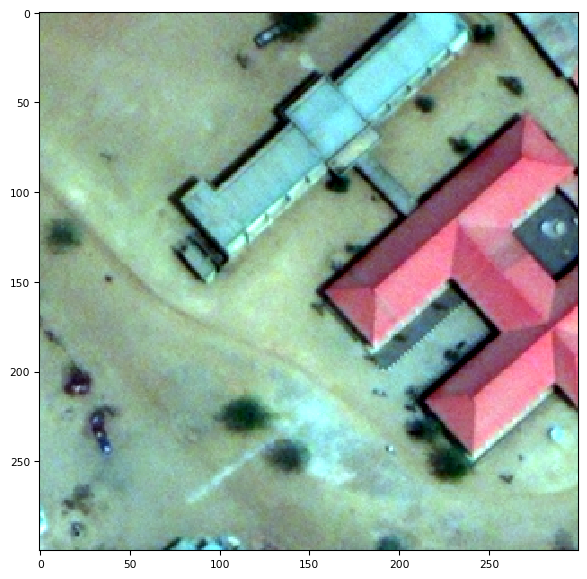

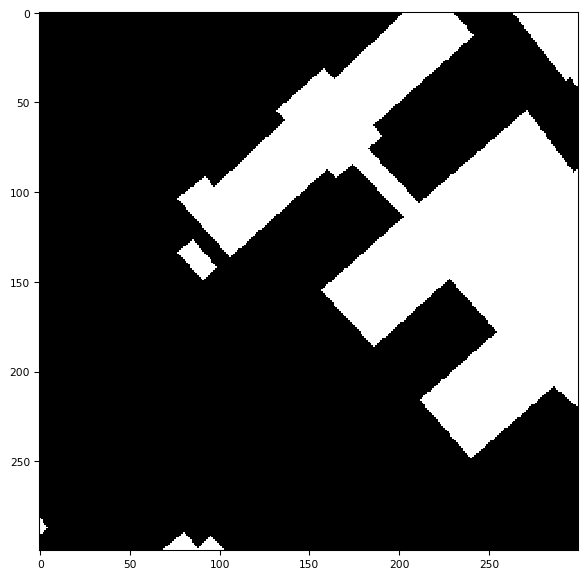

In [4]:
# Test du fichier "treatment.py"

import shapely.affinity
import tifffile as tiff
import matplotlib.pyplot
import csv
import sys

%matplotlib inline

import bin.data_opening as op
import bin.treatment as tr

csv.field_size_limit(sys.maxsize)

# Liste des images annotees
LIST_IMG_ID = ('6010_1_2', '6010_4_2', '6010_4_4', '6040_1_0', '6040_1_3', '6040_2_2', 
         '6040_4_4', '6060_2_3', '6070_2_3', '6090_2_0', '6100_1_3', '6100_2_2',
         '6100_2_3', '6110_1_2', '6110_3_1', '6110_4_0', '6120_2_0', '6120_2_2',
         '6140_1_2', '6140_3_1', '6150_2_3', '6160_2_1', '6170_0_4', '6170_2_4',
         '6170_4_1')

# ID des classes respectives : batiments, routes, arbres, rivieres, lacs 
LIST_POLY_TYPE = ('1', '3', '5', '7', '8')

IMG_ID = LIST_IMG_ID[17]
POLY_TYPE = LIST_POLY_TYPE[0]

# Ouverture des fichiers
data_opening = op.DataOpening()

x_max, y_min = data_opening.get_size(IMG_ID)
train_polygons = data_opening.get_polygons(IMG_ID, POLY_TYPE)
img_rgb, img_size = data_opening.get_tiff(IMG_ID)

# Traitment des fichiers
treatment = tr.Treatment()

x_scaler, y_scaler = treatment.get_scalers(img_size, x_max, y_min)

list_polygons = shapely.affinity.scale(train_polygons, xfact=x_scaler, yfact=y_scaler, origin=(0, 0, 0))

train_mask = treatment.get_mask_polygons(img_size, list_polygons)

img_rgb, train_mask = treatment.set_size(img_rgb, train_mask)

# Affichage des images traitees
tiff.imshow(treatment.get_img_rgb(img_rgb[2900:3200,2000:2300]))
tiff.imshow(treatment.get_img_mask(train_mask[2900:3200,2000:2300]))

print("taille de l'image :", img_size)
print("x_max :", x_max, "| y_min :", y_min)
print(train_polygons)

print("")

print("x_scaler :", x_scaler, "| y_scaler :", y_scaler)
